# Random Forest 

For this notebook we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. Use the load_data.csv already provided.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import Libraries

**Import the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [0]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

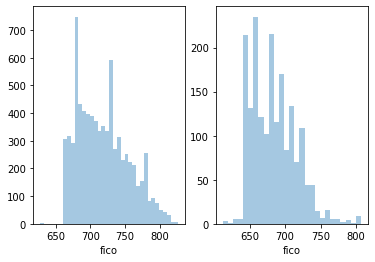

In [6]:
loans_credit1 = loans[loans['credit.policy'] == 1]
loans_credit0 = loans[loans['credit.policy'] == 0]
fig,axes = plt.subplots(1,2)
sns.distplot(loans_credit1['fico'],kde = False,ax = axes[0])
sns.distplot(loans_credit0['fico'],kde = False,ax = axes[1])

** Create a similar figure, except this time select by the not.fully.paid column.**

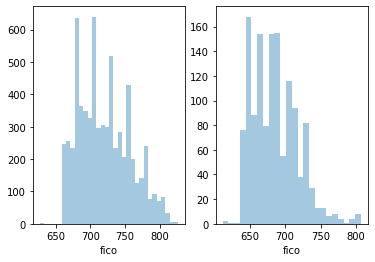

In [7]:
loans_credit1_fullypaid0 = loans[(loans['credit.policy'] == 1) & (loans['not.fully.paid'] == 0)]
loans_credit0_fullypaid0 = loans[(loans['credit.policy'] == 0) & (loans['not.fully.paid'] == 0)]
fig,axes = plt.subplots(1,2)
sns.distplot(loans_credit1_fullypaid0['fico'],kde = False,ax = axes[0])
sns.distplot(loans_credit0_fullypaid0['fico'],kde = False,ax = axes[1])

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

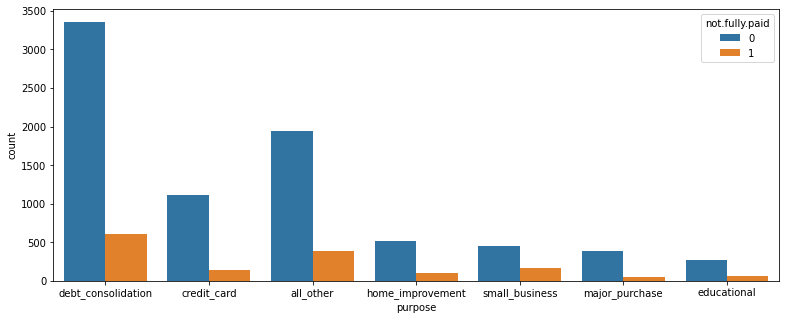

In [8]:
size_p = (13,5)
figure,axs = plt.subplots(figsize = size_p)
sns.countplot(ax = axs,x = 'purpose',data = loans, hue = 'not.fully.paid')

** Let's see the trend between FICO score and INTEREST RATE with a jointplot.**

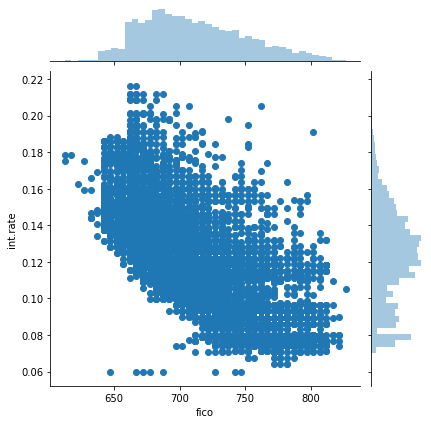

In [9]:
sns.jointplot(x = 'fico',y = 'int.rate',data = loans)

** Create lmplots to see the trend differed between not.fully.paid and credit.policy. Check the documentation for `lmplot()`. **

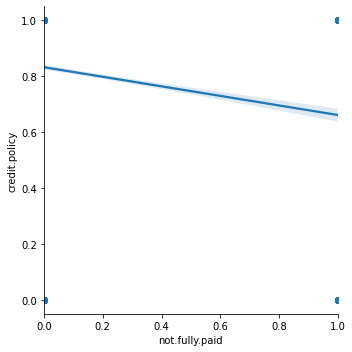

In [10]:
sns.lmplot(x = 'not.fully.paid',y = 'credit.policy',data = loans)

## Setting up the Data
**Check loans.info() again.**

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

We need to trasform the **purpose** column using dummy variables (by using `pd.get_dummies`) so as sklearn will be able to understand them


**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [0]:
cat_feats = loans['purpose']

**Now use `pd.get_dummies()` to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data. Check the documentation to se how `pd.get_dummies()` works.**

In [0]:
fixed_purpose = pd.get_dummies(data = cat_feats)
final_data = loans.join(fixed_purpose)
final_data = final_data.drop(['purpose'],axis = 1)

In [14]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


## Train Test Split

Split the data into a training set and a testing set.

** Use sklearn to split your data into a training set and a testing set.**

In [0]:
from sklearn.model_selection import train_test_split
x_data = final_data.iloc[:,1:]
y_data = final_data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data) 

## Training a Decision Tree Model

Let's start by training a single decision tree first.

** Import DecisionTreeClassifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [0]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report, accuracy score a confusion matrix.**

In [0]:
y_pr = dtree.predict(x_test)

In [20]:
import sklearn as skl
print(skl.metrics.classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       456
           1       0.99      1.00      0.99      1939

    accuracy                           0.99      2395
   macro avg       0.99      0.99      0.99      2395
weighted avg       0.99      0.99      0.99      2395



In [21]:
print(skl.metrics.accuracy_score(y_test,y_pr))

0.9916492693110647


In [22]:
print(skl.metrics.confusion_matrix(y_test,y_pr))

[[ 445   11]
 [   9 1930]]


## Training the Random Forest model

**Create an instance of the RandomForestClassifier class and fit it to our training data.**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
ranforcl = RandomForestClassifier()

In [25]:
ranforcl.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [0]:
y_pre_ran = ranforcl.predict(x_test)

**Compute confusion matrix, accuracy score and classification report.**

In [27]:
print(skl.metrics.classification_report(y_test,y_pre_ran))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       456
           1       0.99      1.00      0.99      1939

    accuracy                           0.99      2395
   macro avg       0.99      0.97      0.98      2395
weighted avg       0.99      0.99      0.99      2395



In [28]:
print(skl.metrics.accuracy_score(y_test,y_pre_ran))

0.9887265135699373


In [29]:
print(skl.metrics.confusion_matrix(y_test,y_pre_ran))

[[ 432   24]
 [   3 1936]]


## Grid Search

#### Create a parameter grid. Focus especially on these hyperparameters: number of estimators, maximum depth, maximum features. You can also investigate minimum samples leaf, minimum sample split, bootstrap. Investigate a little bit on which values/values range to use for each parameter.

#### Create a base classifier.

#### Perform a grid search.

In [30]:
best_sc = 0
for i in range(6,x_train.shape[1]):
        for j in range(10,60):
            for k in range(100,160):
                detree = RandomForestClassifier(n_estimators = k,max_depth = j, max_features = i)
                detree.fit(x_train,y_train)
                y_prees = detree.predict(x_test)
                ac_sc = skl.metrics.accuracy_score(y_test,y_prees)
                if ac_sc > best_sc:
                    print(k)
                    best_max_features = i
                    best_max_depths = j
                    best_estimator = k
                    best_sc = ac_sc

100
131
133
115
126
118
100


KeyboardInterrupt: ignored

#### Fit the estimator to the training data (this will take a while).

In [0]:
i

range(1, 12)


#### Check the best estimator and score.

#### Predict on the test data.

**Compute confusion matrix, accuracy score and classification report.**